## Importing libraries

In [1]:
import os
import sys

import pandas as pd
import geopandas as gpd
import osmnx as ox
import numpy as np
import igraph as ig

import matplotlib.pyplot as plt
import seaborn as sns
import folium

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

module_path = os.path.abspath(os.path.join('../../'))
if module_path not in sys.path:
    sys.path.append(module_path)
    import aup

2023-03-01 19:50:54 Configured OSMnx 1.1.1
2023-03-01 19:50:54 HTTP response caching is on


## Loading dissolved roads from hex within 2km buffer

<AxesSubplot:>

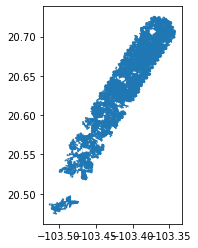

In [19]:
roads_2km  = gpd.read_file("../../data/external/db_segundopiso_temp/marcogeo_ejesviales_dissolved_2km.gpkg")
roads_2km.plot()

In [50]:
roads_2km

,CVEGEO,CVE_ENT,CVE_MUN,CVE_LOC,CVEVIAL,CVESEG,NOMVIAL,TIPOVIAL,SENTIDO,TIPOSEN,AMBITO,geometry
0,140390001,14,039,0001,06922,00001,Misioneros,Calle,Un sentido,1,Urbana,"MULTILINESTRING ((-103.48548 20.53465, -103.48..."
1,140210001,14,021,0001,00009,00001,Camino a la Loma,Calle,Dos sentidos,2,Urbana,"MULTILINESTRING ((-103.45348 20.53685, -103.45..."
2,140080001,14,008,0001,00556,00001,Fenicios,Calle,Dos sentidos,2,Urbana,"MULTILINESTRING ((-103.38593 20.71085, -103.38..."
3,140060001,14,006,0001,00387,00009,Caoba,Calle,Dos sentidos,2,Urbana,"MULTILINESTRING ((-103.40020 20.62931, -103.39..."
4,140970025,14,097,0025,00384,00002,Sendero la Pradera,Calle,Dos sentidos,2,Urbana,"MULTILINESTRING ((-103.48019 20.55908, -103.47..."
...,...,...,...,...,...,...,...,...,...,...,...,...
3530,140390001,14,039,0001,03321,00001,Cremona,Calle,Un sentido,1,Urbana,"MULTILINESTRING ((-103.38713 20.69401, -103.38..."
3531,141200001,14,120,0001,03525,00009,Tizoc,Avenida,Un sentido,1,Urbana,"MULTILINESTRING ((-103.40171 20.65396, -103.40..."
3532,140390001,14,039,0001,03437,00001,Pedro Castera,Calle,Un sentido,1,Urbana,"MULTILINESTRING ((-103.37185 20.68277, -103.37..."
3533,141200001,14,120,0001,00048,00012,Santo Tomás de Aquino,Calle,Dos sentidos,2,Urbana,"MULTILINESTRING ((-103.41496 20.66681, -103.41..."


## Generating public transport routes by street map

10m Buffer to streets

<AxesSubplot:>

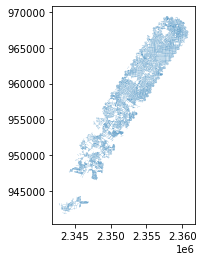

In [25]:
#Creating 2km buffer
roads_2km = roads_2km.to_crs("EPSG:6372")
roads_buffer_10m = roads_2km.buffer(10)
roads_2km = roads_2km.to_crs("EPSG:4326")
roads_buffer_10m.plot()

In [56]:
#Converting geoseries to geodataframe
roads_buffer_10mgdf = gpd.GeoDataFrame(geometry=gpd.GeoSeries(roads_buffer_10m))

#Saving street number
roads_buffer_10mgdf_st = roads_buffer_10mgdf.reset_index()
roads_buffer_10mgdf_st = roads_buffer_10mgdf_st.rename(columns={'index':'street'})
roads_buffer_10mgdf_st

,street,geometry
0,0,"MULTIPOLYGON (((-103.36415 20.71036, -103.3649..."
1,1,"MULTIPOLYGON (((-103.44905 20.54652, -103.4490..."
2,2,"POLYGON ((-103.38700 20.71161, -103.38701 20.7..."
3,3,"POLYGON ((-103.40288 20.62984, -103.40288 20.6..."
4,4,"POLYGON ((-103.48192 20.55917, -103.48192 20.5..."
...,...,...
3530,3530,"POLYGON ((-103.38710 20.69239, -103.38710 20.6..."
3531,3531,"POLYGON ((-103.40467 20.65678, -103.40498 20.6..."
3532,3532,"POLYGON ((-103.37072 20.68285, -103.37071 20.6..."
3533,3533,"POLYGON ((-103.41557 20.66681, -103.41568 20.6..."


### Intersection of GDL Public routes with buffered streets

<AxesSubplot:>

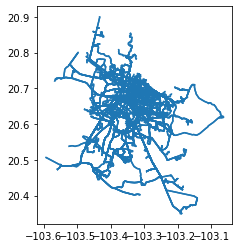

In [26]:
routes_gdl  = gpd.read_file("../../data/external/db_segundopiso_temp/rutastransporte_gdl.gpkg")
routes_gdl.plot()

In [57]:
roads_buffer_10mgdf_st = roads_buffer_10mgdf_st.to_crs("EPSG:4326")
intersect_gdf = roads_buffer_10mgdf_st.overlay(routes_gdl, keep_geom_type=False)
intersect_gdf

,street,Tipo_de_se,Clasificac,Clasifica0,geometry
0,6,Complementaria,Rutas complementarias y otros servicios,Operando,"LINESTRING (-103.38065 20.65310, -103.38065 20..."
1,7,Complementaria,Rutas complementarias y otros servicios,Operando,"LINESTRING (-103.38066 20.65270, -103.38066 20..."
2,19,Complementaria,Rutas complementarias y otros servicios,Operando,"LINESTRING (-103.38064 20.65343, -103.38064 20..."
3,340,Complementaria,Rutas complementarias y otros servicios,Operando,"LINESTRING (-103.38066 20.65092, -103.38066 20..."
4,472,Complementaria,Rutas complementarias y otros servicios,Operando,"LINESTRING (-103.38019 20.65733, -103.38011 20..."
...,...,...,...,...,...
11694,3461,Complementaria,Rutas complementarias y otros servicios,Operando,"LINESTRING (-103.35109 20.68804, -103.35108 20..."
11695,1525,Complementaria,Rutas complementarias y otros servicios,Operando,"LINESTRING (-103.34716 20.69291, -103.34687 20..."
11696,1812,Complementaria,Rutas complementarias y otros servicios,Operando,"LINESTRING (-103.35108 20.68887, -103.35108 20..."
11697,1971,Complementaria,Rutas complementarias y otros servicios,Operando,"LINESTRING (-103.35056 20.68900, -103.35049 20..."


### Grouping routes by street number

In [83]:
intersect_gdf.head(2)

,street,Tipo_de_se,Clasificac,Clasifica0,geometry
0,6,Complementaria,Rutas complementarias y otros servicios,Operando,"LINESTRING (-103.38065 20.65310, -103.38065 20..."
1,7,Complementaria,Rutas complementarias y otros servicios,Operando,"LINESTRING (-103.38066 20.65270, -103.38066 20..."


In [91]:
#Counting routes_count by street
routes_bystreet = intersect_gdf.groupby('street').count()
routes_bystreet = routes_bystreet.reset_index().rename(columns={'Tipo_de_se':'routes_count'})
routes_bystreet_f = routes_bystreet[['street','routes_count']].copy()

print(routes_bystreet_f.shape)
routes_bystreet_f.head()

(1261, 2)


,street,routes_count
0,6,10
1,7,10
2,10,24
3,11,2
4,12,6


In [96]:
routes_bystreetgdf = routes_bystreet_f.merge(roads_buffer_10mgdf_st, on='street')
#routes_bystreetgdf.setgeometry('geometry')
routes_bystreetgdf.head(2)

,street,routes_count,geometry
0,6,10,"POLYGON ((-103.38238 20.65337, -103.38159 20.6..."
1,7,10,"POLYGON ((-103.38238 20.65299, -103.38061 20.6..."


<AxesSubplot:>

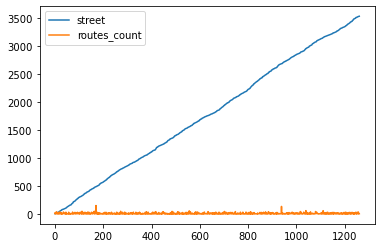

In [94]:
routes_bystreetgdf.plot()